In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newtestimg/images.jpeg
/kaggle/input/numberplate-bounding-box-india-eu-brazil-us/indian_eu_br_us.csv
/kaggle/input/numberplate-bounding-box-india-eu-brazil-us/Indian_eu_br_us_plates_compressed/NZJ6581.jpeg
/kaggle/input/numberplate-bounding-box-india-eu-brazil-us/Indian_eu_br_us_plates_compressed/licensed_car141.jpeg
/kaggle/input/numberplate-bounding-box-india-eu-brazil-us/Indian_eu_br_us_plates_compressed/OUM7311.jpeg
/kaggle/input/numberplate-bounding-box-india-eu-brazil-us/Indian_eu_br_us_plates_compressed/wts-lg-000010.jpeg
/kaggle/input/numberplate-bounding-box-india-eu-brazil-us/Indian_eu_br_us_plates_compressed/car12.jpeg
/kaggle/input/numberplate-bounding-box-india-eu-brazil-us/Indian_eu_br_us_plates_compressed/OZP8126.jpeg
/kaggle/input/numberplate-bounding-box-india-eu-brazil-us/Indian_eu_br_us_plates_compressed/licensed_car47.jpeg
/kaggle/input/numberplate-bounding-box-india-eu-brazil-us/Indian_eu_br_us_plates_compressed/licensed_car182.jpeg
/kaggle/input/numb

In [2]:
import cv2 

In [3]:
data=pd.read_csv('/kaggle/input/numberplate-bounding-box-india-eu-brazil-us/indian_eu_br_us.csv')
data.sample()

,image_name,image_width,image_height,top_x,top_y,bottom_x,bottom_y
527,wts-lg-000035,800,600,0.2725,0.61,0.345,0.658333


In [4]:
#data['top_x']=data['top_x']*data['image_height']


In [5]:
#data['top_y']=data['top_y']*data['image_width']

In [6]:
#data['bottom_x']=data['bottom_x']*data['image_height']

In [7]:
#data['bottom_y']=data['bottom_y']*data['image_width']

In [8]:
#data.iloc[383]

In [9]:
image_names=data['image_name'].values
type(image_names)

numpy.ndarray

In [10]:
data.sample()

,image_name,image_width,image_height,top_x,top_y,bottom_x,bottom_y
650,wts-lg-000174,1280,720,0.345313,0.390278,0.416406,0.452778


In [11]:
from PIL import Image
import os

# Replace 'path/to/your/images' with the actual path to your image folder
folder_path = '/kaggle/input/numberplate-bounding-box-india-eu-brazil-us/Indian_eu_br_us_plates_compressed'

# List all files in the folder
#image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
l=[]
# Iterate through each image file

for image_file in image_names:
    # Create the full path to the image file
    image_path = os.path.join(folder_path, image_file+'.jpeg')
    arr=cv2.imread(image_path)
    arr2=cv2.resize(arr,(256,256),interpolation=cv2.INTER_AREA)
    l.append(arr2)

#### X=np.array(l)/255
Y=data.drop(columns=['image_name','image_height','image_width'],axis=1)
Y=Y

In [12]:
X=np.array(l)/255
Y=data.drop(columns=['image_name','image_height','image_width'],axis=1)
Y=Y

In [13]:
X[0]

array([[[0.83529412, 0.76078431, 0.70980392],
        [0.84313725, 0.76862745, 0.71764706],
        [0.83921569, 0.76470588, 0.71372549],
        ...,
        [0.81960784, 0.74509804, 0.69411765],
        [0.81960784, 0.74509804, 0.69411765],
        [0.81960784, 0.74509804, 0.69411765]],

       [[0.83529412, 0.76078431, 0.70980392],
        [0.84313725, 0.76862745, 0.71764706],
        [0.83921569, 0.76470588, 0.71372549],
        ...,
        [0.81960784, 0.74509804, 0.69411765],
        [0.81960784, 0.74509804, 0.69411765],
        [0.81960784, 0.74509804, 0.69411765]],

       [[0.83529412, 0.76078431, 0.70980392],
        [0.84313725, 0.76862745, 0.71764706],
        [0.83921569, 0.76470588, 0.71372549],
        ...,
        [0.81960784, 0.74509804, 0.69411765],
        [0.81960784, 0.74509804, 0.69411765],
        [0.81960784, 0.74509804, 0.69411765]],

       ...,

       [[0.2745098 , 0.54901961, 0.61568627],
        [0.30196078, 0.54509804, 0.65098039],
        [0.31372549, 0

In [14]:
'''fx=[256/x for x in Y['image_width']]
fy=[256/x for x in Y['image_height']]
fxm=[]
fym=[]
for i in range(len(fx)):
   uu for j,k in zip(Y['top_x'],Y['top_y']):
        fxm.append(j*fx[i])
        fym.append(k*fy[i])
        break
fxm1=[]
fym1=[]'''

'''for i in range(len(fx)):
    for j,k in zip(Y['bottom_x'],Y['bottom_y']):
        fxm1.append(j*fx[i])
        fym1.append(k*fy[i])
        break'''
#Y['top_x']=fxm
#Y['top_y']=fym
#Y['bottom_x']=fxm1
#Y['bottom_y']=fym1

"for i in range(len(fx)):\n    for j,k in zip(Y['bottom_x'],Y['bottom_y']):\n        fxm1.append(j*fx[i])\n        fym1.append(k*fy[i])\n        break"

In [15]:
Y.sample()

,top_x,top_y,bottom_x,bottom_y
447,0.350781,0.647917,0.541406,0.730208


In [16]:
s=259
z=Y.iloc[s].values*256
z

array([ 93.04312115, 137.07579469, 159.80287462, 155.22738381])

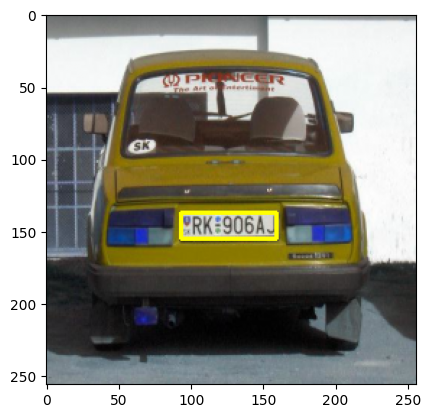

In [17]:
import matplotlib.pyplot as plt
ordinates = list(map(int,(z[0], z[1], z[2], z[3])))
color = (255, 255, 0)
thickness = 2 
%matplotlib inline
cv2.rectangle(X[s], (ordinates[0],ordinates[1]),(ordinates[2],ordinates[3]),color, thickness)
plt.imshow(X[s])

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)


In [19]:
xtrain.shape

(536, 256, 256, 3)

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten, Dense, Input, Dropout
from keras.regularizers import l2

2024-03-08 06:13:07.816069: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 06:13:07.816168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 06:13:07.947974: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
model=Sequential()
model.add(Conv2D(200,(5,5),activation='relu',padding='same',input_shape=(256,256,3)))
model.add(Dropout(0.1))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(100,(5,5),activation='relu',padding='same'))
model.add(Dropout(0.15))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(80,(5,5),activation='relu',padding='same'))
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.15))
model.add(Conv2D(60,(5,5),activation='relu',padding='same'))
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dropout(0.15))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.175))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(4,activation='sigmoid'))
model.compile(optimizer='adam',loss='mse')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


added layers


In [22]:
histr=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=30)

Epoch 1/30


2024-03-08 06:13:39.486267: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[200,3,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,256,256]{3,2,1,0}, f32[32,200,256,256]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-08 06:13:39.757279: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.271125102s
Trying algorithm eng0{} for conv (f32[200,3,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,256,256]{3,2,1,0}, f32[32,200,256,256]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-08 06:13:41.493644: E external/

 1/17 ━━━━━━━━━━━━━━━━━━━━ 11:20 43s/step - loss: 0.0531

I0000 00:00:1709878441.898994      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 0.0431

2024-03-08 06:14:22.663408: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[100,200,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,200,85,85]{3,2,1,0}, f32[24,100,85,85]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-08 06:14:24.965412: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 3.302128388s
Trying algorithm eng0{} for conv (f32[100,200,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[24,200,85,85]{3,2,1,0}, f32[24,100,85,85]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-08 06:14:27.412703: E external/

17/17 ━━━━━━━━━━━━━━━━━━━━ 113s 4s/step - loss: 0.0424 - val_loss: 0.0252
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - loss: 0.0292 - val_loss: 0.0226
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - loss: 0.0284 - val_loss: 0.0223
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - loss: 0.0263 - val_loss: 0.0221
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - loss: 0.0271 - val_loss: 0.0196
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0247 - val_loss: 0.0180
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0259 - val_loss: 0.0178
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0236 - val_loss: 0.0158
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0225 - val_loss: 0.0160
Epoch 10/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0198 - val_loss: 0.0152
Epoch 11/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - loss: 0.0181 - val_loss: 0.0124
Epoch 12/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.0

In [23]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=30)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - loss: 0.0057 - val_loss: 0.0061
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0050 - val_loss: 0.0063
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0046 - val_loss: 0.0060
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0044 - val_loss: 0.0052
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0041 - val_loss: 0.0053
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0046 - val_loss: 0.0053
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0053 - val_loss: 0.0059
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0040 - val_loss: 0.0053
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.0042 - val_loss: 0.0051
Epoch 10/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0039 - val_loss: 0.0062
Epoch 11/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0042 - val_loss: 0.0055
Epoch 12/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step

In [24]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - loss: 0.0028 - val_loss: 0.0051
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0031 - val_loss: 0.0050
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - loss: 0.0035 - val_loss: 0.0049
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0030 - val_loss: 0.0048
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - loss: 0.0029 - val_loss: 0.0051
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0031 - val_loss: 0.0045
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0027 - val_loss: 0.0057
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0040 - val_loss: 0.0057
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0040 - val_loss: 0.0049
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0036 - val_loss: 0.0055
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0034 - val_loss: 0.0054
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step

In [25]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - loss: 0.0025 - val_loss: 0.0045
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0021 - val_loss: 0.0045
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0035 - val_loss: 0.0051
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0035 - val_loss: 0.0047
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.0030 - val_loss: 0.0048
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0021 - val_loss: 0.0046
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0031 - val_loss: 0.0054
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.0029 - val_loss: 0.0046
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0025 - val_loss: 0.0045
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0025 - val_loss: 0.0046
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.0021 - val_loss: 0.0044
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step

In [26]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=30)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - loss: 0.0024 - val_loss: 0.0045
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.0020 - val_loss: 0.0046
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0021 - val_loss: 0.0044
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0019 - val_loss: 0.0046
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0019 - val_loss: 0.0044
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0023 - val_loss: 0.0042
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0020 - val_loss: 0.0043
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0020 - val_loss: 0.0045
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.0021 - val_loss: 0.0043
Epoch 10/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 11/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.0023 - val_loss: 0.0048
Epoch 12/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step

In [27]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=30)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - loss: 0.0024 - val_loss: 0.0045
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0024 - val_loss: 0.0048
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.0020 - val_loss: 0.0049
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0026 - val_loss: 0.0048
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0020 - val_loss: 0.0056
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0020 - val_loss: 0.0044
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0018 - val_loss: 0.0049
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0021 - val_loss: 0.0044
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0020 - val_loss: 0.0045
Epoch 10/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0017 - val_loss: 0.0048
Epoch 11/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - loss: 0.0024 - val_loss: 0.0044
Epoch 12/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step

In [28]:
print(model.evaluate(xtest,ytest))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0054
0.004794588778167963


In [29]:
folder_path='/kaggle/input/images-to-test'
image_file='/kaggle/input/images-to-test/plate 2.JPG'
image_path = os.path.join(folder_path, image_file)
arr=cv2.imread(image_path)
arr2=cv2.resize(arr,(256,256),interpolation=cv2.INTER_AREA)
arr2=np.array([arr2])
ans=model.predict(arr2/255)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [30]:
ans

array([[0.30402666, 0.42603192, 0.6854686 , 0.5548018 ]], dtype=float32)

In [31]:
ans=ans*256

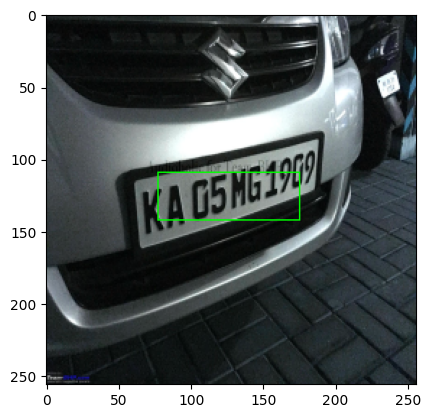

In [32]:
import matplotlib.pyplot as plt
ordinates = list(map(int,(ans[0][0], ans[0][1], ans[0][2], ans[0][3])))
# Draw the rectangle on the image
color = (0, 255, 0)
thickness = 1
%matplotlib inline
cv2.rectangle(arr2[0], (ordinates[0],ordinates[1]),(ordinates[2],ordinates[3]),color, thickness)
plt.imshow(arr2[0])

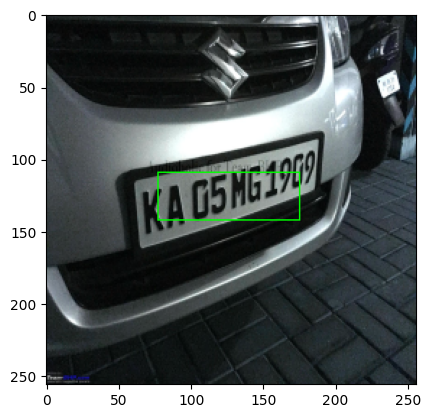

In [33]:
plt.imshow(arr2[0])

In [34]:
import pickle

In [35]:
Filename = "model_with_val_loss__0.0089.keras"  

model.save(Filename)